In [1]:
from torch.optim import Adam
import torch
import numpy as np
from matplotlib import pyplot as plt
from bbb import BayesMLP, RegressionELBOLoss

torch.manual_seed(0)
np.random.seed(0)
device = 'cpu'

In [2]:
# ===== 数据准备

def toy_function(x):
    return x*np.sin(x)

x = torch.tensor([ -4,  -2,  -1,  .0, 1,  2, 4]).reshape(-1,1)
y = toy_function(x)
x, y = x.to(device), y.to(device)

In [3]:
# ===== 模型定义
model = BayesMLP(1, 1, [16]).to(device)
# 优化器
opt = Adam(model.parameters(), lr=0.05)
# 损失
loss_fn = RegressionELBOLoss(batch_num=1)  # 没有使用小批量

In [4]:
# ===== 训练
epochs = 1000
for epoch in range(epochs):                                                         # 算法2：第2行
    opt.zero_grad()
    model_out = model(x, 1)
    loss = loss_fn(model_out, y)
    loss.backward()                                                                 # 算法2：第9行
    opt.step()                                                                      # 第法2：第12行
    if epoch % 100 == 0:
        print(f'epoch: {epoch:>5}/{epochs:<10} Loss: {loss.item():.6}')

epoch:     0/1000       Loss: 1548.56
epoch:   100/1000       Loss: 399.491
epoch:   200/1000       Loss: 197.991
epoch:   300/1000       Loss: 189.636
epoch:   400/1000       Loss: 185.291
epoch:   500/1000       Loss: 213.009
epoch:   600/1000       Loss: 332.985
epoch:   700/1000       Loss: 182.998
epoch:   800/1000       Loss: 201.483
epoch:   900/1000       Loss: 231.462


In [5]:
# ===== 测试、可视化
model.eval()
# 测试数据
x_test = torch.linspace(-6.5, 6.5, 100)
y_test = toy_function(x_test)

# 模型预测sample_num次
y_preds = model(x_test.reshape(-1,1).to(device), sample_num=100)
y_preds = np.array([s.cpu().detach().numpy() for s in y_preds]).squeeze(-1)

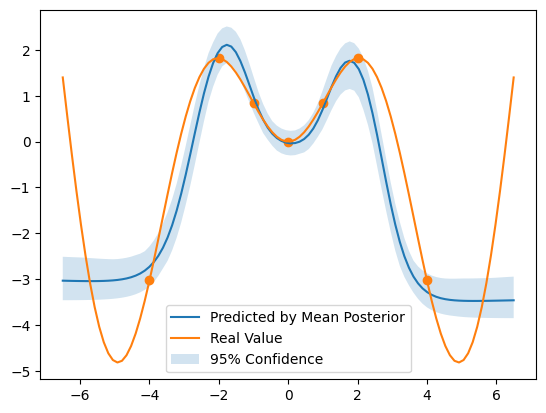

In [6]:
plt.plot(x_test, np.mean(y_preds, axis = 0), label='Predicted by Mean Posterior')    # 平均预测
plt.plot(x_test, y_test, label='Real Value')                                    # 真实值
plt.fill_between(x_test.reshape(-1),
                 np.percentile(y_preds, 2.5, axis = 0),
                 np.percentile(y_preds, 97.5, axis = 0),
                 alpha = 0.2, label='95% Confidence')
plt.legend()
plt.scatter(x.cpu(), toy_function(x.cpu()))
plt.legend()
plt.show()